In [1]:
from pathlib import Path
from book_loader import BookLoader
import pandas as pd
import matplotlib.pyplot as plt
import re

import spacy
from spacy.lang.fr.stop_words import STOP_WORDS as fr_stop
# spacy.prefer_gpu() # NB doesn't have access to GPU through WSL

In [2]:
data_path = Path("data/D5627-Dolan.docx").expanduser().resolve()

start_marker = r"^Introduction$"
compiled_header_marker = re.compile(rf"(?:^Chapitre \d+ /.+"
                           rf"|{start_marker}"
                           rf"|^Stress, santé et performance au travail$)")
compiled_end_marker = re.compile(r"^Annexe /$")
compiled_ps_marker = re.compile(r"^Conclusion$")
chapter_marker = r"^Chapitre (\d+) /$"
na_span_markers = (
        [r"^exerCiCe \d\.\d /$"],
        [chapter_marker,
         r"^Les caractéristiques personnelles\.",
         r"/\tLocus de contrôle$",
         r"^L'observation de sujets a amené Rotter",
         r"^Lorsqu'une personne souffre de stress"])

book = BookLoader(data_path,
                  {"start_marker": start_marker,
                   "end_marker": compiled_end_marker,
                   "chapter_marker": chapter_marker,
                   "header_marker": compiled_header_marker,
                   "ps_marker": compiled_ps_marker,
                   "na_span_markers": na_span_markers})
    
chapters: list[list[str]] = book.chapters

/home/ahmedm/anaconda3/envs/LDS/lib/python3.10/site-packages/simplify_docx/iterators/generic.py:193: UnexpectedElementWarning: Skipping unexpected tag: {http://schemas.openxmlformats.org/wordprocessingml/2006/main}pict
  warn("Skipping unexpected tag: %s" % (current.tag),


In [6]:
df = pd.DataFrame(data={"chapters": range(len(chapters))})

def count_words(i):
    return sum(map(lambda p: len(p.split()), chapters[i]))

df["words"] = df["chapters"].apply(count_words)
                      

def count_unique_words(i):
    return len(set('\n'.join(chapters[i]).split()))

df["unique_words"] = df["chapters"].apply(count_unique_words)


def count_stop_words(p):
    return sum(1 for w in p.split() if w in fr_stop)

df["stop_words"] = df["chapters"].apply(
    lambda i: sum(map(count_stop_words, chapters[i])))


# def count_bisections(p):
#     return len(bisection_pat.findall(p))

# bisection_pat = re.compile(r"([A-Za-z]+)-\s([A-Za-z]+)")
# df["bisected_words"] = df["chapters"].apply(
#     lambda i: sum(map(count_bisections, chapters[i])))


df.style.hide(axis='index')

chapters,words,unique_words,stop_words
0,4640,1748,2111
1,7940,2625,3417
2,11217,3450,4687
3,11522,3638,4934
4,14736,4637,6522
5,14983,4252,6605
6,1754,822,796


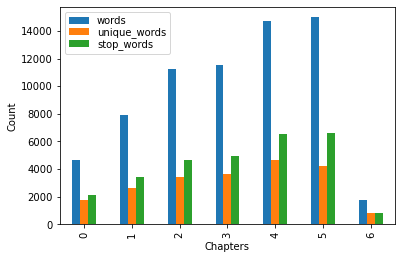

In [7]:
bar_plot = df.iloc[:, 1:].plot.bar(xlabel="Chapters", ylabel="Count")
plt.legend(loc='best', labelspacing=0.1)
fig = plt.gcf()

In [8]:
fig.savefig("stats.jpg")